# Explore here

In [1]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../data/raw/dataset.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


id                                   ------------
name                                 Nombre del anuncio
host_id                              id del dueño
host_name                            nombre del dueño
neighbourhood_group                  barrio/provincia
neighbourhood                        localidad
latitude                             ------------
longitude                            ------------
room_type                            tipo de habitacion 'Private room', 'Entire home/apt', 'Shared room'
price                                precio por noche $
minimum_nights                       minimo noches
number_of_reviews                    n_reviews totales
last_review                          fecha ultima review
reviews_per_month                    cantidad de reviews por mes
calculated_host_listings_count       cuantas casas tiene el host en la web para reservar
availability_365                     dias al año disponible para reservar

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

"last_review" has no datetime dtype so we'll need to address it. We can also drop "id", "name", "host_name" since there's no real value on those columns

In [4]:
df.drop(["id", "name", "host_name"], axis=1, inplace=True)


In [5]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let's check for null values

In [6]:
print(df.shape)
df.isnull().sum()

(48895, 13)


host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Check if the n_reviews == 0 then last_review and reviews_per_month are null
df_rev = df.loc[df['number_of_reviews'] == 0, ['last_review','reviews_per_month']]

if df_rev['reviews_per_month'].sum() == df_rev['last_review'].sum():
    print(True)


True


In [8]:

# Replace the unknown values for 0
df['reviews_per_month'].fillna(0, inplace=True)

# Convert to datetime
df['last_review']= pd.to_datetime(df['last_review'], errors='coerce')

# Create an auxiliar column to indicate later on to the model if it was a null value or not
df['date_missing'] = df['last_review'].isna()

# Fill missing values with an arbitrary "1000-01-01"
placeholder = pd.Timestamp('1900-01-01')
df['last_review'] = df['last_review'].fillna(placeholder)

# Extract year, month, and day
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month
df['review_day'] = df['last_review'].dt.day

# Drop
df.drop(['last_review'], axis=1, inplace=True)

df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
date_missing                      0
review_year                       0
review_month                      0
review_day                        0
dtype: int64

In [9]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date_missing,review_year,review_month,review_day
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,False,2018,10,19
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,False,2019,5,21
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,True,1900,1,1
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,False,2019,7,5
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,False,2018,11,19


In [10]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year,review_month,review_day
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,1993.969731,5.109970,12.748052
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,47.815376,3.076477,10.644206
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,1.000000,1.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,2016.000000,1.000000,1.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,2019.000000,6.000000,11.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,2019.000000,7.000000,23.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,12.000000,31.000000


We can see there are some houses listing for $0. That doesn't make any sense.
We also can see that there are houses that are booked all year long since they have 0 days available.

In [11]:
# Drop houses with price == 0
df = df[df['price'] != 0]

In [12]:
# Check for duplicated values
df.duplicated().value_counts()

False    48884
dtype: int64

In [13]:
# Check for diferent values of room_type to see if it's consistent.
print(df['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room']


In [14]:
df['host_id'].duplicated().value_counts()

False    37455
True     11429
Name: host_id, dtype: int64

In [15]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_year,review_month,review_day
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498,1993.966615,5.110036,12.747177
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271,47.817568,3.076562,10.644398
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,1.000000,1.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,2016.000000,1.000000,1.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,2019.000000,6.000000,11.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,2019.000000,7.000000,23.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,12.000000,31.000000


<Axes: ylabel='price'>

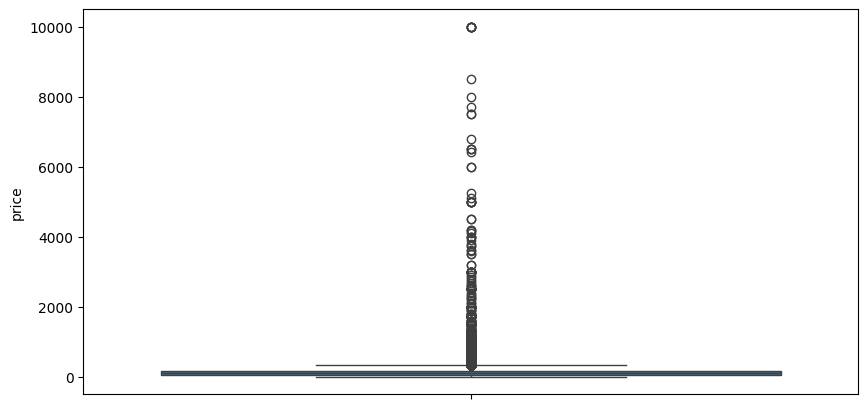

In [16]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df, y='price')

Check for unique neighbourhood and neighborhood groups

In [17]:
print(f"Unique neighborhood groups: {len(df['neighbourhood_group'].unique())}")
print(f"Unique neighborhood: {len(df['neighbourhood'].unique())}")

Unique neighborhood groups: 5
Unique neighborhood: 221


In [18]:
df.groupby(["neighbourhood_group"])[['price','number_of_reviews','availability_365']].agg(['count','mean','median'])

price                    number_of_reviews             \
                     count        mean median             count       mean   
neighbourhood_group                                                          
Bronx                 1090   87.577064   65.0              1090  25.977982   
Brooklyn             20095  124.438915   90.0             20095  24.197661   
Manhattan            21660  196.884903  150.0             21660  20.986565   
Queens                5666   99.517649   75.0              5666  27.700318   
Staten Island          373  114.812332   75.0               373  30.941019   

                           availability_365                     
                    median            count        mean median  
neighbourhood_group                                             
Bronx                  9.0             1090  165.794495  148.0  
Brooklyn               6.0            20095  100.217318   28.0  
Manhattan              4.0            21660  111.984580   36.0  
Queens                 7.0             5666  144.451818   98.0  
Staten Island         12.0              373  199.678284  219.0

<Axes: xlabel='neighbourhood_group', ylabel='price'>

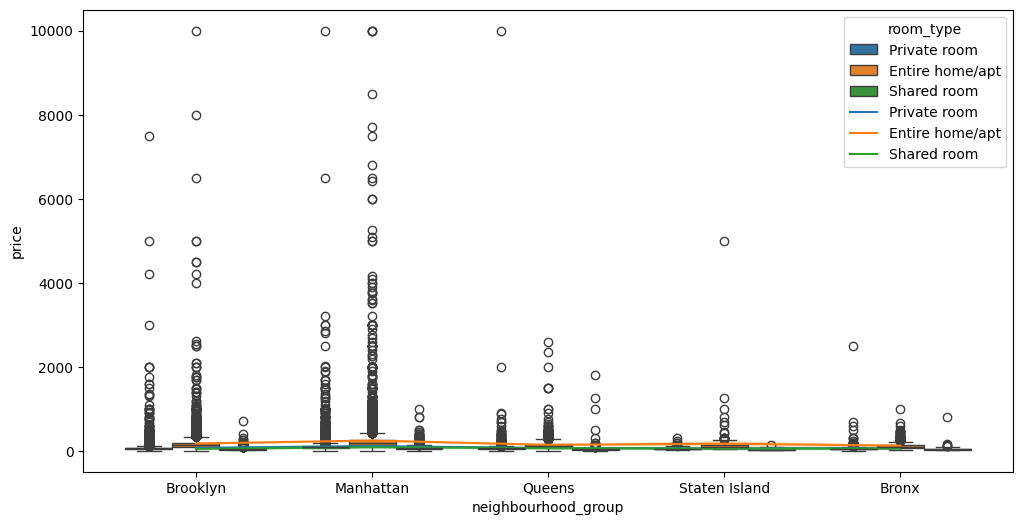

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x='neighbourhood_group', y='price',hue='room_type', data=df)
sns.lineplot(y='price', x='neighbourhood_group', data= df, hue='room_type')

In [20]:
# Save processed data ready to model

df.to_csv('../data/processed/dataset_processed.csv')

# Scaling

In [21]:
# Separate data between Train and Test
X = df.drop("price", axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date_missing,review_year,review_month,review_day
44559,133588507,Queens,Jamaica,40.70840,-73.78882,Entire home/apt,3,6,3.05,1,37,False,2019,7,5
31363,8973065,Brooklyn,Williamsburg,40.70343,-73.93412,Private room,5,5,0.35,1,0,False,2018,11,26
42274,8589557,Bronx,Woodlawn,40.89981,-73.86684,Private room,2,7,1.84,1,70,False,2019,6,3
11756,47621361,Manhattan,Chelsea,40.74526,-73.99545,Private room,14,1,0.02,1,0,False,2016,1,1
23350,9492212,Brooklyn,Park Slope,40.67075,-73.97690,Private room,1,0,0.00,4,0,True,1900,1,1


In [22]:
num_variables = ["latitude", "longitude", "availability_365",\
    "calculated_host_listings_count","number_of_reviews","minimum_nights", \
    "host_id", "review_year", "review_month","review_day", "reviews_per_month", "date_missing"]

In [23]:
# Instantiate scaler
scaler = StandardScaler()

# Train scaler
scaler.fit(X_train[num_variables])

# Apply scaler
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,latitude,longitude,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,host_id,review_year,review_month,review_day,reviews_per_month,date_missing
44559,-0.378083,3.542731,-0.578053,-0.186526,-0.387428,-0.195648,0.836844,0.522294,0.619388,-0.728654,1.209911,-0.507604
31363,-0.469215,0.389794,-0.858685,-0.186526,-0.409856,-0.100454,-0.745907,0.501354,1.924262,1.244215,-0.461474,-0.507604
42274,3.131694,1.849736,-0.327759,-0.186526,-0.365000,-0.243245,-0.750778,0.522294,0.293169,-0.916546,0.460883,-0.507604
11756,0.297798,-0.941036,-0.858685,-0.186526,-0.499567,0.327918,-0.255032,0.459474,-1.337925,-1.104438,-0.665754,-0.507604
23350,-1.068450,-0.538510,-0.858685,-0.095097,-0.521995,-0.290842,-0.739313,-1.969561,-1.337925,-1.104438,-0.678135,1.970039


# Encoder


We'll encode **neighbourhood_group** and **room_type** with one-hot since they only have 8 total unique values and won't affect the computation time by a lot.
We'll encode **neighbourhood** with a label encoder since there are over 200 unique values.

In [24]:
cat_variables = ["neighbourhood_group", "room_type"]

In [25]:
# Instantiate encoders
label_encoder_neighbourhood = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Train encoders
label_encoder_neighbourhood.fit(X_train['neighbourhood'])
onehot_encoder.fit(X_train[cat_variables])

# Transform label encoder training data
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

X_train_cat_le['neigh_le'] = label_encoder_neighbourhood.transform(X_train['neighbourhood'])

# Handle unseen labels in test data
unseen_labels_mask = ~X_test_cat_le['neighbourhood'].isin(label_encoder_neighbourhood.classes_)
X_test_cat_le.loc[unseen_labels_mask, 'neighbourhood'] = 'Unknown'

# Extend label encoder with 'Unknown'
label_encoder_neighbourhood.classes_ = np.append(label_encoder_neighbourhood.classes_, 'Unknown')

# Transform label encoder test data
X_test_cat_le['neigh_le'] = label_encoder_neighbourhood.transform(X_test_cat_le['neighbourhood'])

# Transform one hot training data
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index=X_train.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

# Transform one hot testing data
X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index=X_test.index, columns=onehot_encoder.get_feature_names_out(cat_variables))


# Drop extra columns from label encoding
df_drop = df.drop(['price'], axis=1)
cols = df_drop.columns

X_train_cat_le.drop(cols, axis=1, inplace=True)
X_test_cat_le.drop(cols, axis=1, inplace=True)

# Check if the result is correct
print(f"{X_train_cat_le.head()}\n\n")
print(X_train_cat_ohe) 

       neigh_le
44559       104
31363       212
42274       216
11756        33
23350       150


       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
44559                        0.0                           0.0   
31363                        0.0                           1.0   
42274                        1.0                           0.0   
11756                        0.0                           0.0   
23350                        0.0                           1.0   
...                          ...                           ...   
11284                        0.0                           0.0   
44743                        0.0                           0.0   
38169                        1.0                           0.0   
860                          0.0                           0.0   
15795                        0.0                           0.0   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
44559                            0.0     

In [26]:
# Unify dataset after preparing the data
X_train_final = pd.concat([X_train_cat_le, X_train_cat_ohe, X_train_num_scal], axis=1)
X_test_final = pd.concat([X_test_cat_le, X_test_cat_ohe, X_test_num_scal], axis=1)

In [27]:
X_train_final.head()

,neigh_le,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,latitude,...,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,host_id,review_year,review_month,review_day,reviews_per_month,date_missing
44559,104,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.378083,...,-0.578053,-0.186526,-0.387428,-0.195648,0.836844,0.522294,0.619388,-0.728654,1.209911,-0.507604
31363,212,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.469215,...,-0.858685,-0.186526,-0.409856,-0.100454,-0.745907,0.501354,1.924262,1.244215,-0.461474,-0.507604
42274,216,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.131694,...,-0.327759,-0.186526,-0.365000,-0.243245,-0.750778,0.522294,0.293169,-0.916546,0.460883,-0.507604
11756,33,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.297798,...,-0.858685,-0.186526,-0.499567,0.327918,-0.255032,0.459474,-1.337925,-1.104438,-0.665754,-0.507604
23350,150,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.068450,...,-0.858685,-0.095097,-0.521995,-0.290842,-0.739313,-1.969561,-1.337925,-1.104438,-0.678135,1.970039


In [29]:
X_test_final.head()

,neigh_le,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,latitude,...,availability_365,calculated_host_listings_count,number_of_reviews,minimum_nights,host_id,review_year,review_month,review_day,reviews_per_month,date_missing
41320,33,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.160642,...,-0.638730,-0.095097,-0.432284,0.232724,2.154554,0.522294,0.293169,0.398700,-0.189100,-0.507604
22079,60,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.144208,...,0.938879,-0.095097,1.945058,-0.243245,0.594119,0.522294,0.293169,1.526054,1.822752,-0.507604
18778,212,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.182616,...,-0.122973,0.026809,-0.297717,1.089469,-0.228573,0.522294,-0.359269,0.774484,-0.480045,-0.507604
25494,204,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.143177,...,-0.858685,-0.186526,-0.499567,-0.290842,-0.765459,0.480414,0.945606,0.210808,-0.653374,-0.507604
44319,93,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.530557,...,1.909716,-0.156049,-0.521995,-0.148051,2.263154,-1.969561,-1.337925,-1.104438,-0.678135,1.970039


# Modeling

Since I'm not sure which model would perform better under our current data features I'm gonna measure the absolute error of different model types to focus on the ones that perform the best.

In [28]:
# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100),
    'Support Vector Regression': SVR(kernel='linear'),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store the performance of each model
model_performance = {}

In [29]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_final, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_final)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    model_performance[model_name] = mae
    
model_performance

KeyboardInterrupt: 

#### Best performing models

**MEA (mean_absolute_error):**

**Support Vector Regression: 62.04**

**Gradient Boosting Regression: 66.05**

**Random Forest Regression: 66.08** 

These models are known for handling better complex relationships than the other models. And Linear Regression being that high suggests that the relationship between features in our data might not be linear.

We also want to know which features are the most important so let's check it.

In [32]:
# Train the Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_final, y_train)

# Extract feature importance
feature_importances = forest_reg.feature_importances_

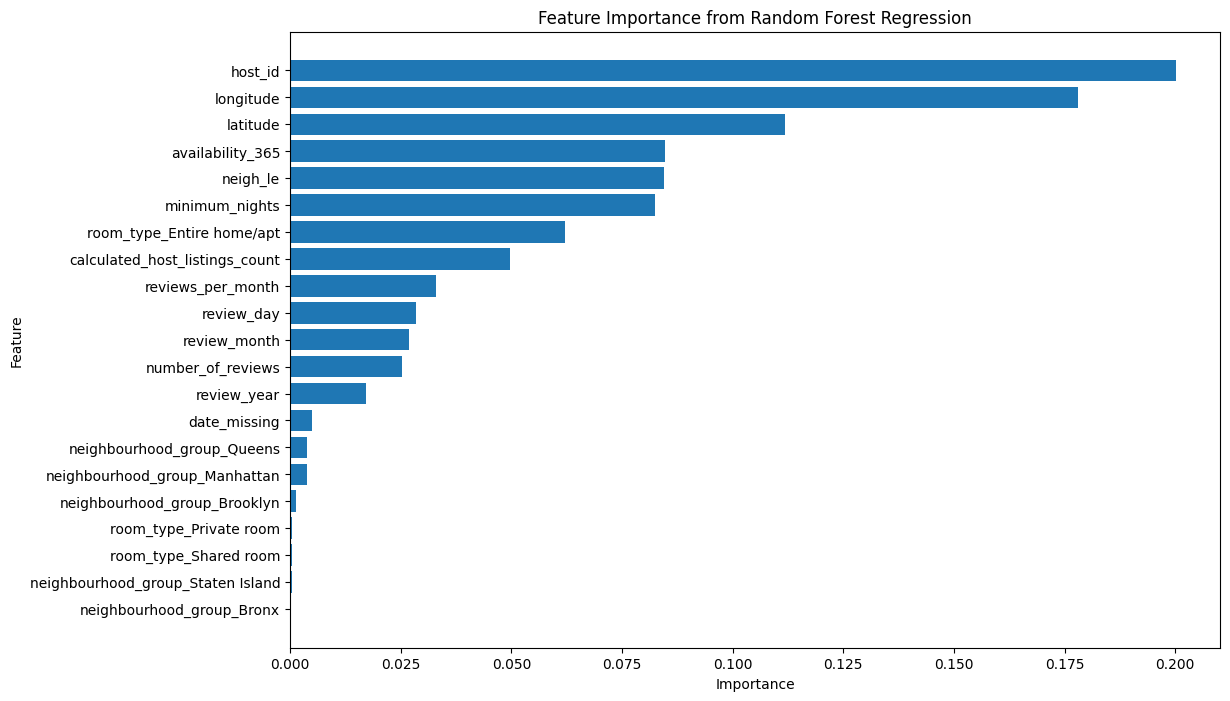

,Feature,Importance
15,host_id,0.200124
10,longitude,0.178007
9,latitude,0.111853
11,availability_365,0.084831
0,neigh_le,0.084559
14,minimum_nights,0.082542
6,room_type_Entire home/apt,0.062179
12,calculated_host_listings_count,0.049697
19,reviews_per_month,0.033021
18,review_day,0.028426


In [33]:
# Create a DataFrame to visualize the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Regression')
plt.gca().invert_yaxis()
plt.show()

# Display the feature importance DataFrame

feature_importance_df

#### Top Features:

host_id: Suggests that the host influences a lot on the price, possibly due to reputation or number of properties managed.

longitude: Geographic location matters

latitude: Geographic location matters

availability_365: Probably affects demand which directly influences it's price

neigh_le: Same as before, location matters. There are some neighborhoods more attractive than others which influences the price

minimum_nights: Directly influences the pricing, different minimum stays will most likely have different pricing strategies

room_type_Entire home/apt: Booking the entire apartment is, of course, an influential factor.

calculated_host_listing_count: Same as before, the host matters. Probably due to host experience/reputation or bulk pricing.

reviews_per_month: Indicates popularity which should affect demand which affects pricing

I'm gonna focus on the top features to see if, doing that, we can improve the accuracy of our models.

In [34]:
# List of top features
top_features = [
    'host_id', 'longitude', 'latitude', 'availability_365',
    'neigh_le', 'minimum_nights', 'room_type_Entire home/apt',
    'calculated_host_listings_count', 'reviews_per_month',
    'review_day', 'review_month', 'number_of_reviews', 'review_year'
]

# Create new datasets with only the top features
x_train_top = X_train_final[top_features]
x_test_top = X_test_final[top_features]

In [35]:
# Dictionary to store the performance of each model with top features
model_performance_top = {}

# Train and evaluate each model with top features
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_top, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_top)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    model_performance_top[model_name] = mae

model_performance_top


{'Linear Regression': 73.62016428281848,
 'Decision Tree Regression': 84.05922061982203,
 'Random Forest Regression': 65.79779755207801,
 'Gradient Boosting Regression': 66.56456776115635,
 'Support Vector Regression': 63.52274864433942,
 'K-Nearest Neighbors Regression': 74.94321366472332}

In [36]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 10),  # Randomly sample C from a uniform distribution
    'epsilon': uniform(0.01, 0.1),  # Randomly sample epsilon from a uniform distribution
    'kernel': ['linear', 'rbf']  # Sample kernels from a fixed list
}

# Initialize the SVR model
svr = SVR()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_absolute_error', random_state=42)

# Fit the model
random_search.fit(x_train_top, y_train)

# Get the best parameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

In [47]:
# Predict using the best model from RandomSearchCV
y_pred = best_model_random.predict(x_test_top)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-Squared (R²)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display all metrics
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R^2': r2,
    'MAPE': mape
}

Model Evaluation Metrics:
MAE: 63.521839743393905
MSE: 36857.419369624826
RMSE: 191.9828621768746
R^2: 0.07939189298730265
MAPE: 38.70638844806364


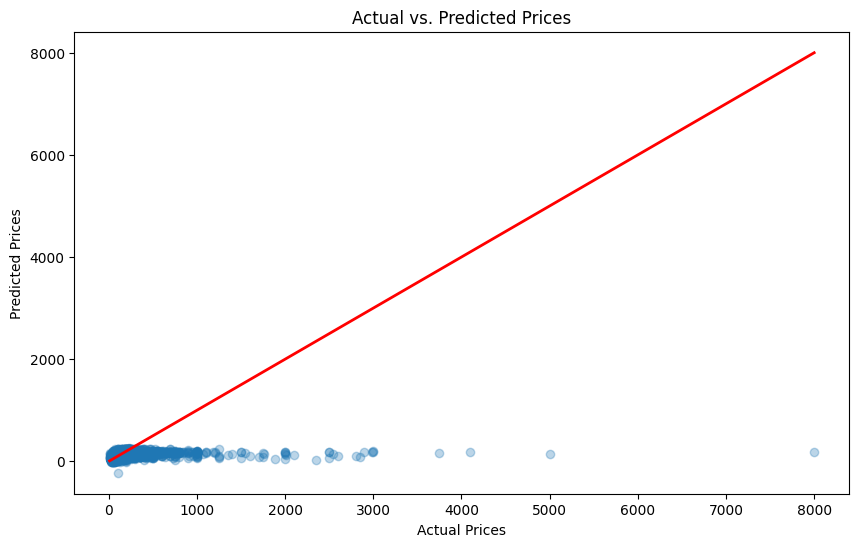

In [48]:
# Print metrics
print("Model Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

**MAE:** The predictions are, on average, off by around 63.52 units. 

**MSE:** This value is fairly high, indicating that there are some large errors with predictions. It also tends to exagerate large errors since it squares them

**RMSE:** Same units as the target variable, being that high suggests the presence of some significant prediction errors.

**R^2:** Only 7.9% are true positives so it's performance is really bad.

**MAPE:** 

In [30]:
# List of top features
top_features = [
    'host_id', 'longitude', 'latitude', 'availability_365',
    'neigh_le', 'minimum_nights', 'room_type_Entire home/apt',
    'calculated_host_listings_count', 'reviews_per_month', 'number_of_reviews']

# Create new datasets with only the top features
x_train_top = X_train_final[top_features]
x_test_top = X_test_final[top_features]

In [31]:
# Dictionary to store the performance of each model with top features
model_performance_top = {}

# Train and evaluate each model with top features
for model_name, model in models.items():
    # Train the model
    model.fit(x_train_top, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_top)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    model_performance_top[model_name] = mae

model_performance_top


{'Linear Regression': 73.70551054572086,
 'Decision Tree Regression': 83.95213255599877,
 'Random Forest Regression': 65.2026872592138,
 'Gradient Boosting Regression': 66.59075488428918,
 'Support Vector Regression': 63.7697523653311,
 'K-Nearest Neighbors Regression': 71.55771709113225}

In [32]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 10),  # Randomly sample C from a uniform distribution
    'epsilon': uniform(0.01, 0.1),  # Randomly sample epsilon from a uniform distribution
    'kernel': ['linear', 'rbf']  # Sample kernels from a fixed list
}

# Initialize the SVR model
svr = SVR()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_dist, n_iter=20, cv=3, scoring='neg_mean_absolute_error', random_state=42)

# Fit the model
random_search.fit(x_train_top, y_train)

# Get the best parameters and model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

In [ ]:
# Predict using the best model from RandomSearchCV
y_pred = best_model_random.predict(x_test_top)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-Squared (R²)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display all metrics
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R^2': r2,
    'MAPE': mape
}

In [ ]:
# Print metrics
print("Model Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()